In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time


%matplotlib inline

In [2]:
cd code

/Users/tianchushu/syntaxerror-mlpp2018/code


In [3]:
import final_connection
import final_default_grids
import final_explore_and_viz
import final_load_dfs
import final_plot
import final_preprocessing
import final_temporal
import indpv_lists as final_options
import jocojims
import final_classifier_final

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
# LOADS CSV WITH MERGED DATA WITH ACS
df = final_load_dfs.load_from_file('FINAL.csv')

#Save a clean copy for later viz purpose
viz_df = df.copy()

# FINDING BASE PROBABILITY OF RE-ENTRY
print ('Prob of re-entry within one year')
print (df['within_one'].sum()/df.shape[0])
print ('Prob of re-entry within two year')
print (df['within_two'].sum()/df.shape[0])
print (' ')


LoadedFINAL.csv
Prob of re-entry within one year
0.21966193263209594
Prob of re-entry within two year
0.2725821634674416
 


In [5]:
# DROPPING COLUMNS NOT USED IN ANALYSIS
print('DROPPING THESE COLUMNS: ', jocojims.DROP_COLS)
df = df.drop(jocojims.DROP_COLS, axis = 1)
print (' ')

# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , jocojims.DUMMIES)
for dummy in jocojims.DUMMIES:
    df = final_preprocessing.dummy_variable(dummy, df)
print (' ')

# DISCRETIZATION
for category in jocojims.CATS:
    df = final_preprocessing.bin_gen(df, category, '_bin', 'suffix' )
print ('Discretizing the following variables: ', jocojims.CATS)
print (' ')

DROPPING THESE COLUMNS:  ['re_entry', 'mni_no', 'dedupe_id', 'dob', 'state', 'city', 'zip', 'release_date', 'case_no', 'booking_no', 'pri_dx_value', 'refferal_source', 'after_released']
 
The following columns have been broken into dummies: ['sex', 'race', 'mar_stat', 'case_type', 'arresting_agency', 'arresting_agency_type', 'bail_type']
 
Discretizing the following variables:  ['age', 'per_capita_income', 'poverty_stat', 'household_income', 'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18', 'SSI_income', 'grandparent_care', 'military_service', 'education_25', 'property_value_occupied', 'retirement_income', 'rent_over_income', 'bail_amt']
 


In [6]:
df.columns

Index(['booking_date', 'bailed_out', 'mh_treatment', 'within_one',
       'within_two', 'sexFEMALE', 'sexMALE', 'sexmissing',
       'raceAMERICAN INDIAN OR ALASKA NATIVE', 'raceASIAN',
       ...
       'retirement_income_bin3', 'retirement_income_bin4',
       'rent_over_income_bin1', 'rent_over_income_bin2',
       'rent_over_income_bin3', 'rent_over_income_bin4', 'bail_amt_bin1',
       'bail_amt_bin2', 'bail_amt_bin3', 'bail_amt_bin4'],
      dtype='object', length=114)

In [7]:
# SETTING DATES FOR SEPARATING TRAIN & TESTING DATA
end =  df['booking_date'].max()[:10]
start =  df['booking_date'].min()[:10]
middle_date = '2015-07-01'

# SPLITTING DATASET INTO TRAINING AND TESTING
train, test = final_temporal.temporal_split(df, 'booking_date', start, middle_date, end)
trainv,testv = final_temporal.temporal_split(viz_df, 'booking_date', start, middle_date, end)


# SPLITTING DEPENDENT AND INDEPENDENT VARIABLES
# within_one == come back within one year
# within_two == come back within two year
y = ['within_one', 'within_two']
x_train, x_test, y_train, y_test = final_temporal.split_data(train, test, y)

a, viz_x, b, c = final_temporal.split_data(trainv,testv, y)

In [8]:
final_options.person_societal_var

['mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'age_bin1',
 'age_bin2',
 'age_bin3',
 'age_bin4',
 'own_children_under18_bin1',
 'own_children_under18_bin2',
 'own_children_under18_bin3',
 'own_children_under18_bin4',
 'grandparent_care_bin1',
 'grandparent_care_bin2',
 'grandparent_care_bin3',
 'grandparent_care_bin4',
 'military_service_bin1',
 'military_service_bin2',
 'military_service_bin3',
 'military_service_bin4',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'per_capita_income_bin1',
 'per_capita_income_bin2',
 'per_capita_income_bin3',
 'per_capita_income_bin4',
 'poverty_stat_bin1',
 'poverty_stat_bin2',
 'poverty_stat_bin3',
 'poverty_stat_bin4',
 'household_income_bin1',
 'household_income_bin2',
 'household_income_bin3',
 'household_income_bin4',
 'mortgage_stat_bin1',
 'mortgage_stat_bin2'

In [9]:
#Running on Unbiased set of personal data and census data
x_train = x_train[final_options.person_societal_var]
x_test = x_test[final_options.person_societal_var]

In [10]:
results = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'])

In [11]:
best = final_classifier_final.best_grid(results)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
39,Bag,"{'max_features': 10, 'max_samples': 10, 'n_est...",0.5478,0.2240,0.1091,"(0.2637, 0.0659, 0.1055)","(0.2335, 0.1168, 0.1557)","(0.2445, 0.2445, 0.2445)"
23,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 1000}",0.5774,0.2481,13.5525,"(0.3187, 0.0797, 0.1275)","(0.2637, 0.1319, 0.1758)","(0.2734, 0.2734, 0.2734)"
93,ET,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.5938,0.2584,1.1151,"(0.3242, 0.081, 0.1297)","(0.3187, 0.1593, 0.2125)","(0.3063, 0.3063, 0.3063)"
48,Logit,"{'C': 10, 'penalty': 'l1'}",0.5850,0.2518,1.6011,"(0.3077, 0.0769, 0.1231)","(0.2692, 0.1346, 0.1795)","(0.2802, 0.2802, 0.2802)"
114,NB,{},0.5522,0.2328,0.0314,"(0.3352, 0.0838, 0.1341)","(0.2665, 0.1332, 0.1777)","(0.2266, 0.2266, 0.2266)"
15,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",0.5972,0.2628,1.3254,"(0.3462, 0.0865, 0.1385)","(0.3462, 0.1731, 0.2308)","(0.294, 0.294, 0.294)"
81,Tree,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.5957,0.2474,0.0209,"(0.2802, 0.0701, 0.1121)","(0.2912, 0.1456, 0.1941)","(0.2898, 0.2898, 0.2898)"


In [12]:
#best

In [13]:
df_sorting = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_one'], y_test['within_one'], best, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [14]:
#Use the best performed Random Forest model to see the top 10% at risk people's data

In [15]:
RF_df = df_sorting.sort_values(by=['RF'], ascending=False)

In [16]:
RF_df.columns

Index(['SSI_income', 'after_released', 'age', 'arresting_agency',
       'arresting_agency_type', 'bail_amt', 'bail_type', 'bailed_out',
       'booking_no', 'case_no', 'case_type', 'city', 'dedupe_id', 'dob',
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mni_no', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'pri_dx_value', 'property_value_occupied', 'race', 're_entry',
       'refferal_source', 'release_date', 'rent_over_income',
       'retirement_income', 'school_enrollment_16-19', 'sex', 'state', 'zip',
       'Bag', 'Boost', 'ET', 'Logit', 'NB', 'RF', 'Tree'],
      dtype='object')

In [17]:
RF_df[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
948,407,0.0,22.0,OVERLAND PARK P.D.,CITY,2500.0,ORCD,1,15011815,15CR02484,...,missing,KS,66062,0.180000,0.500099,0.962000,0.593232,1.000000,0.926423,1.000000
22489,354,-38.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.156667,0.499581,0.923077,0.152990,1.000000,0.855463,0.923077
22488,354,488.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.156667,0.499581,0.923077,0.152990,1.000000,0.855463,0.923077
2595,475,1282.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000811,14CR02514,...,MALE,KS,66061,0.231667,0.499759,0.982917,0.303389,1.000000,0.811299,1.000000
3837,475,0.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000762,16CR00054,...,MALE,KS,66061,0.231667,0.499759,0.982917,0.303389,1.000000,0.811299,1.000000
19452,694,0.0,38.0,LEAWOOD P.D.,CITY,2500.0,PR,1,15007825,15DV00865,...,FEMALE,KS,66209,0.176667,0.499657,0.898254,0.203842,0.999999,0.758034,1.000000
8468,591,-127.0,40.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15007735,15CR01572,...,FEMALE,KS,66204,0.223333,0.499801,0.769231,0.309423,1.000000,0.756772,0.769231
8467,591,63.0,40.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15007735,15CR01572,...,FEMALE,KS,66204,0.223333,0.499801,0.769231,0.309423,1.000000,0.756772,0.769231
8912,591,0.0,34.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,10000.0,SUR,1,15009332,15CR01845,...,FEMALE,KS,66204,0.223333,0.499801,0.769231,0.309423,1.000000,0.756772,0.769231
22709,683,-43.0,52.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,15014404,14CR02304,...,MALE,KS,66006,0.176667,0.499610,0.904861,0.176424,1.000000,0.730575,1.000000


In [18]:
def plotting_curves (dataframe, feature):
    '''
    Given a dataframe, a column name, 
        displays a plot of that dataframe column distribution.
        
    Input:
        dataframe
        feature: column name (string)
        
    Return:
        displays a distribution of that variable
        
    Inspired by:
        https://seaborn.pydata.org/generated/seaborn.distplot.html
    '''
    title = feature + ' Graph'
    ax = sns.distplot(dataframe[feature])
    ax.set_title(title)


In [19]:
def value_counter (dataframe, feature):
    '''
    Given a dataframe, and feature,
        gives the number of occurrences of each value in that feature column
        
    Input:
        dataframe
        feature: string
    
    Output: dataframe
    '''
    return dataframe[feature].value_counts()

In [20]:
features_to_see = ['bail_amt', 'bail_type', 'bailed_out','case_type', 'city', 
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'property_value_occupied', 'race', 're_entry', 'rent_over_income']

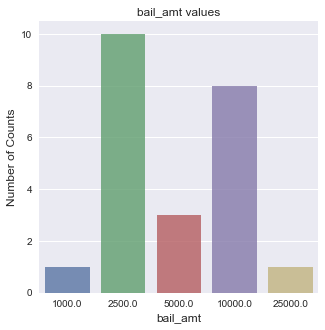

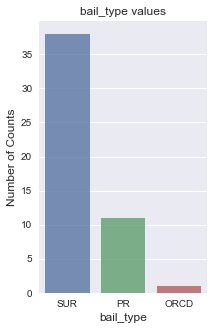

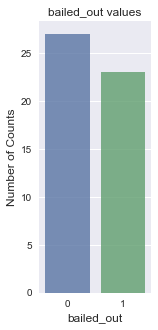

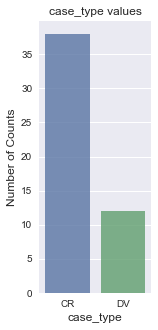

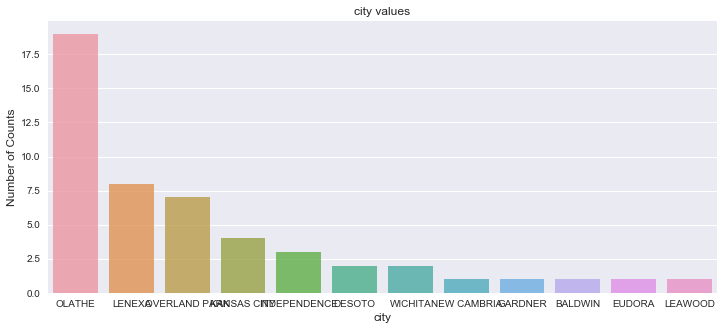

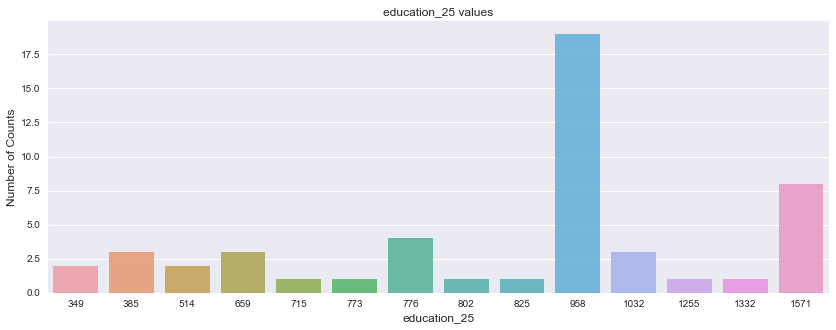

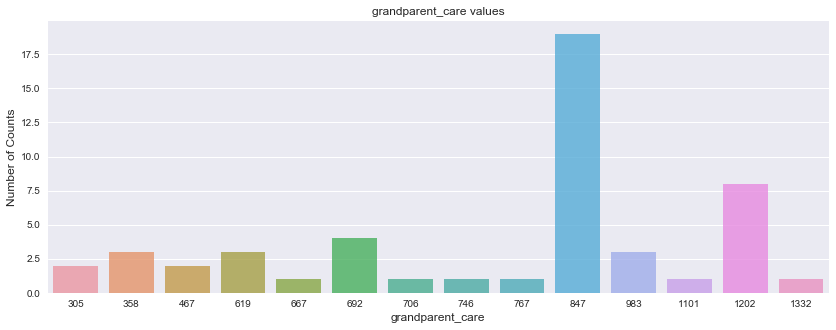

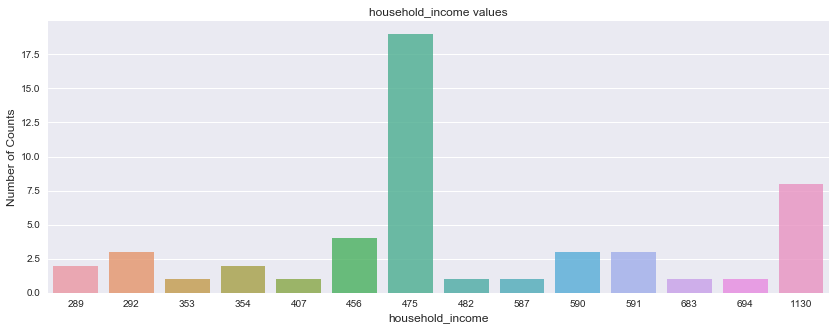

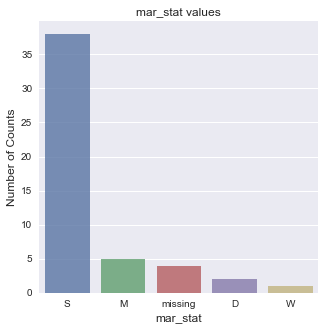

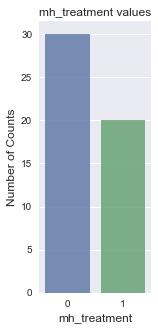

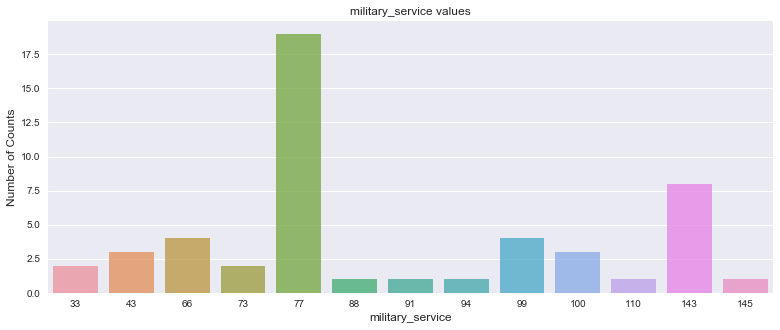

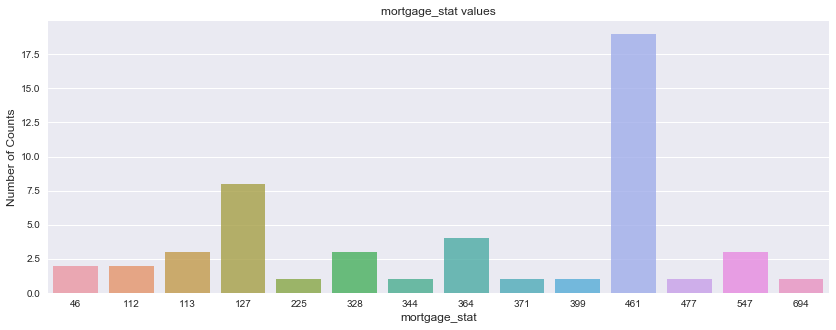

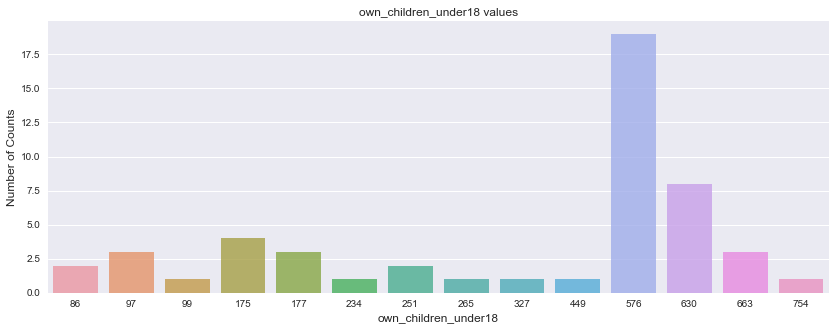

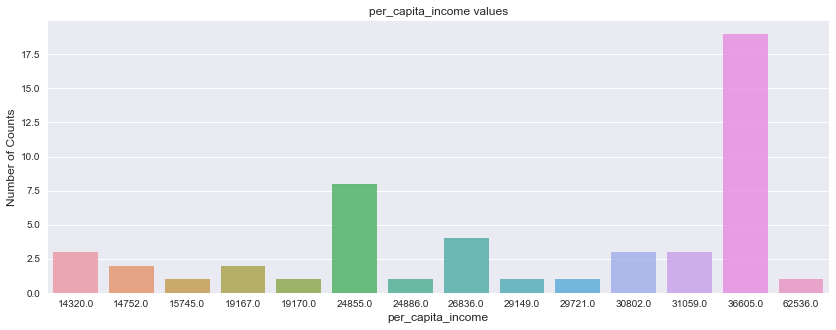

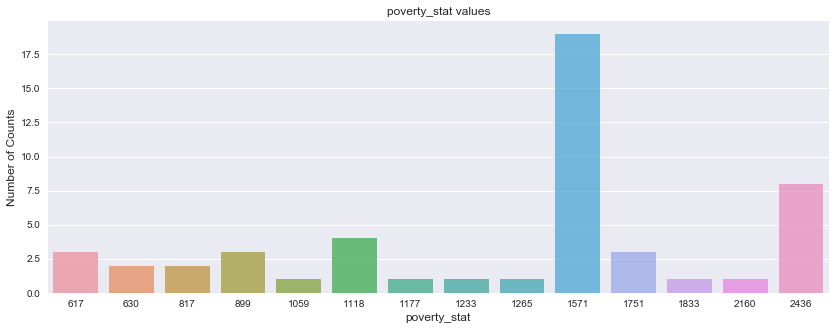

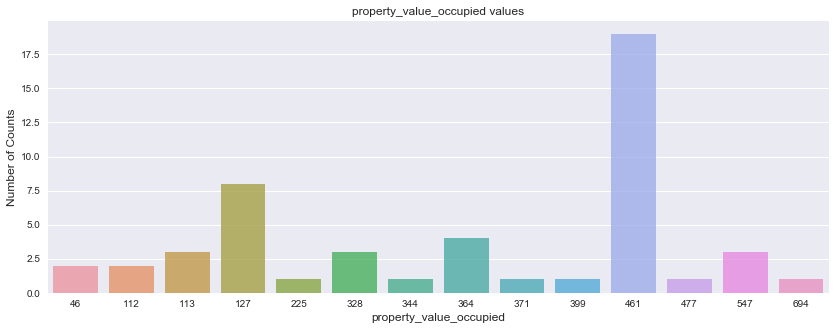

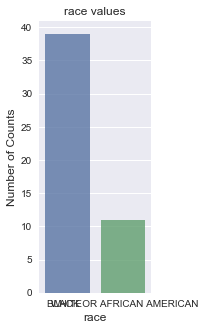

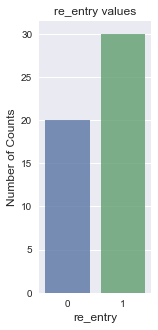

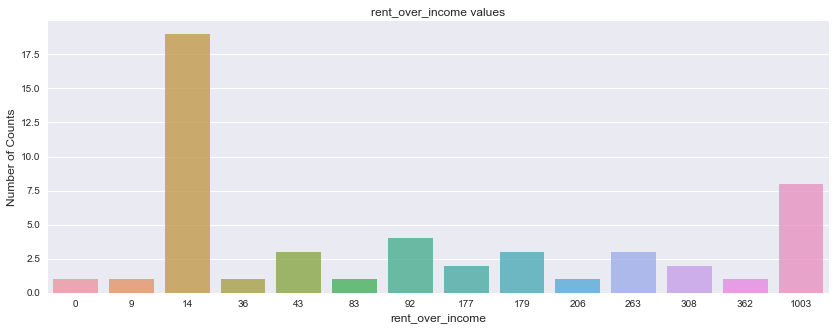

In [21]:
final_plot.plot_df(RF_df[:50], features_to_see, save=False)

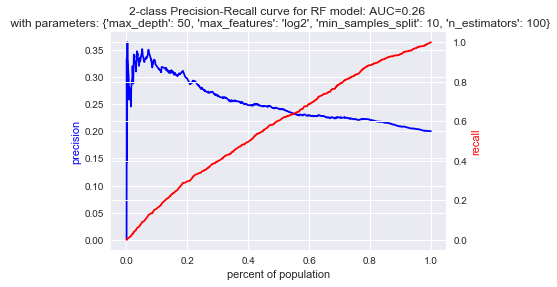

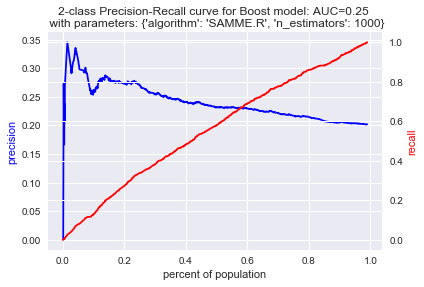

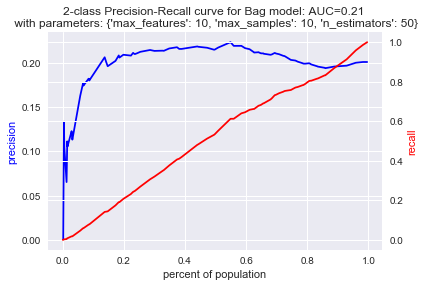

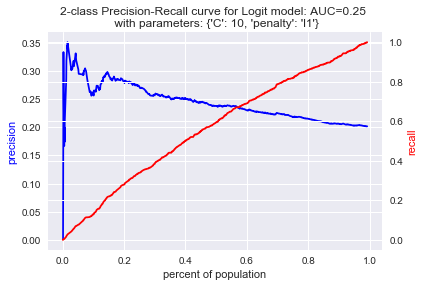

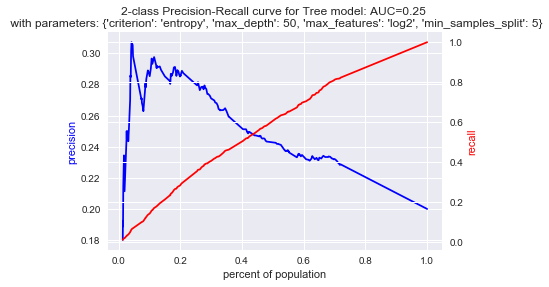

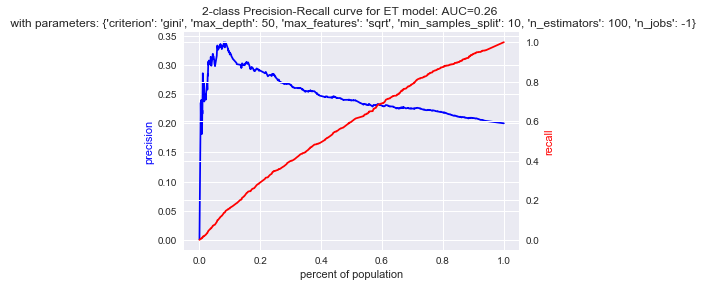

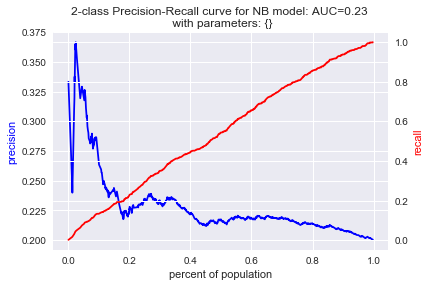

In [22]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"],  x_train, x_test, y_train['within_one'], y_test['within_one'], best)

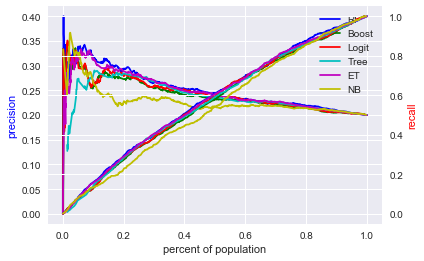

In [23]:
final_plot.plot_mult(['RF', 'Boost', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'], best)

Feature ranking for within_one
1. age_bin1 (0.065980)
2. sexMALE (0.050645)
3. sexFEMALE (0.050588)
4. mar_statS (0.048347)
5. age_bin3 (0.044771)
6. age_bin2 (0.044699)
7. age_bin4 (0.042625)
8. raceWHITE (0.042384)
9. mar_statM (0.040419)
10. raceBLACK OR AFRICAN AMERICAN (0.038984)
11. mar_statmissing (0.034482)
12. mar_statD (0.029185)
13. per_capita_income_bin1 (0.020383)
14. school_enrollment_16-19_bin3 (0.017752)
15. rent_over_income_bin3 (0.017511)
16. per_capita_income_bin3 (0.016503)
17. school_enrollment_16-19_bin4 (0.016258)
18. military_service_bin3 (0.016090)
19. rent_over_income_bin2 (0.015970)
20. per_capita_income_bin2 (0.015020)


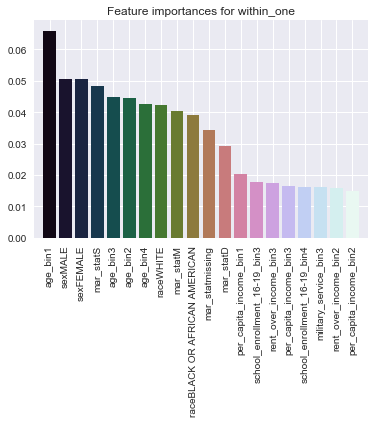

In [24]:
final_plot.feature_importance(x_train, y_train['within_one'], best, "ET",20)

In [26]:
########Running everything on second y within two year of re-entry

In [25]:
results2 = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'])

In [26]:
best2 = final_classifier_final.best_grid(results2)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
27,Bag,"{'max_features': 5, 'max_samples': 5, 'n_estim...",0.5449,0.2928,0.1076,"(0.3681, 0.0714, 0.1195)","(0.3516, 0.1363, 0.1965)","(0.2953, 0.229, 0.2579)"
23,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 1000}",0.5768,0.3137,13.7710,"(0.3846, 0.0745, 0.1249)","(0.3681, 0.1427, 0.2057)","(0.3448, 0.2673, 0.3011)"
113,ET,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.6010,0.3290,0.9087,"(0.3901, 0.0756, 0.1267)","(0.3764, 0.1459, 0.2103)","(0.3613, 0.2801, 0.3155)"
49,Logit,"{'C': 10, 'penalty': 'l2'}",0.5831,0.3190,0.2985,"(0.4066, 0.0788, 0.132)","(0.3681, 0.1427, 0.2057)","(0.3558, 0.2758, 0.3107)"
114,NB,{},0.5509,0.2986,0.0289,"(0.4121, 0.0799, 0.1338)","(0.3407, 0.1321, 0.1903)","(0.3063, 0.2375, 0.2675)"
11,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",0.6025,0.3335,1.3573,"(0.4121, 0.0799, 0.1338)","(0.3791, 0.147, 0.2118)","(0.3654, 0.2833, 0.3191)"
60,Tree,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.6016,0.3146,0.0199,"(0.3077, 0.0596, 0.0999)","(0.4148, 0.1608, 0.2318)","(0.3613, 0.2801, 0.3155)"


In [27]:
best2

{'Bag': {'max_features': [5], 'max_samples': [5], 'n_estimators': [50]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [1000]},
 'ET': {'criterion': ['entropy'],
  'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'Logit': {'C': [10], 'penalty': ['l2']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['sqrt'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['gini'],
  'max_depth': [20],
  'max_features': ['log2'],
  'min_samples_split': [2]}}

In [28]:
viz_x.columns

Index(['SSI_income', 'after_released', 'age', 'arresting_agency',
       'arresting_agency_type', 'bail_amt', 'bail_type', 'bailed_out',
       'booking_no', 'case_no', 'case_type', 'city', 'dedupe_id', 'dob',
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mni_no', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'pri_dx_value', 'property_value_occupied', 'race', 're_entry',
       'refferal_source', 'release_date', 'rent_over_income',
       'retirement_income', 'school_enrollment_16-19', 'sex', 'state', 'zip'],
      dtype='object')

In [29]:
df_sorting2 = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_two'], y_test['within_two'], best2, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [30]:
RF_df2 = df_sorting2.sort_values(by=['RF'], ascending=False)

In [31]:
RF_df2[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
948,407,0.0,22.0,OVERLAND PARK P.D.,CITY,2500.0,ORCD,1,15011815,15CR02484,...,missing,KS,66062,0.266667,0.500338,0.947917,0.796283,1.000000,0.948081,1.000000
22489,354,-38.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.233333,0.499664,1.000000,0.200532,1.000000,0.926723,1.000000
22488,354,488.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.233333,0.499664,1.000000,0.200532,1.000000,0.926723,1.000000
2595,475,1282.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000811,14CR02514,...,MALE,KS,66061,0.263333,0.499877,0.990444,0.408156,1.000000,0.838239,0.340426
3837,475,0.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000762,16CR00054,...,MALE,KS,66061,0.263333,0.499877,0.990444,0.408156,1.000000,0.838239,0.340426
8912,591,0.0,34.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,10000.0,SUR,1,15009332,15CR01845,...,FEMALE,KS,66204,0.296667,0.499873,0.846154,0.374017,1.000000,0.828756,0.846154
8467,591,63.0,40.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15007735,15CR01572,...,FEMALE,KS,66204,0.296667,0.499873,0.846154,0.374017,1.000000,0.828756,0.846154
8468,591,-127.0,40.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15007735,15CR01572,...,FEMALE,KS,66204,0.296667,0.499873,0.846154,0.374017,1.000000,0.828756,0.846154
3338,475,0.0,NaN,OLATHE P.D.,CITY,NaN,SUR,0,16002959,16CR00680,...,MALE,KS,66061,0.243333,0.499894,0.985444,0.423377,1.000000,0.807137,0.340426
3308,475,31.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,15011946,16CR00175,...,MALE,KS,66061,0.243333,0.499894,0.985444,0.423377,1.000000,0.807137,0.340426


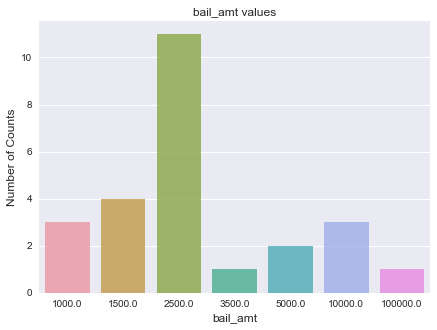

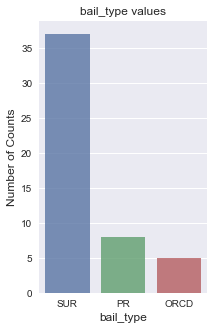

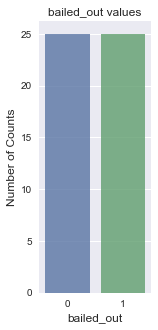

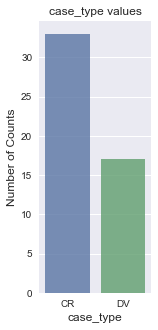

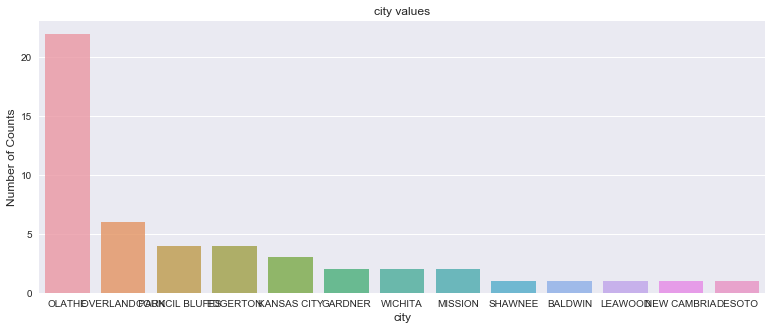

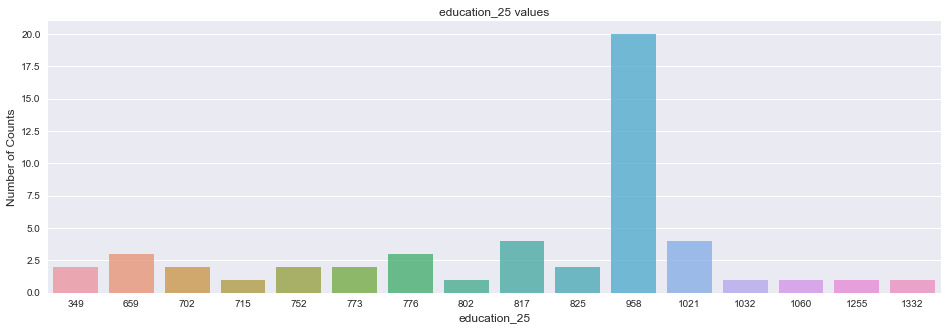

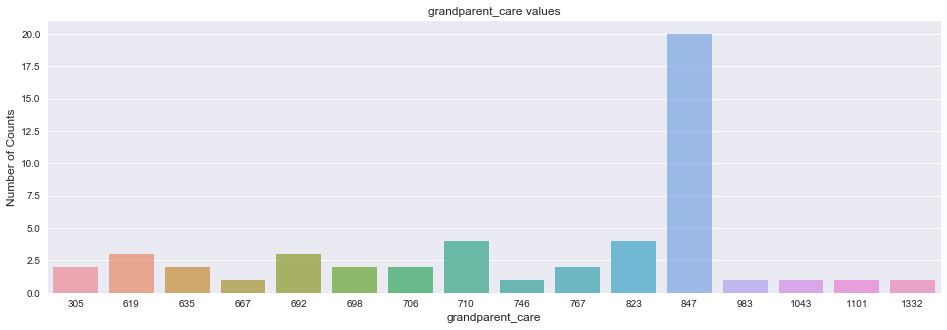

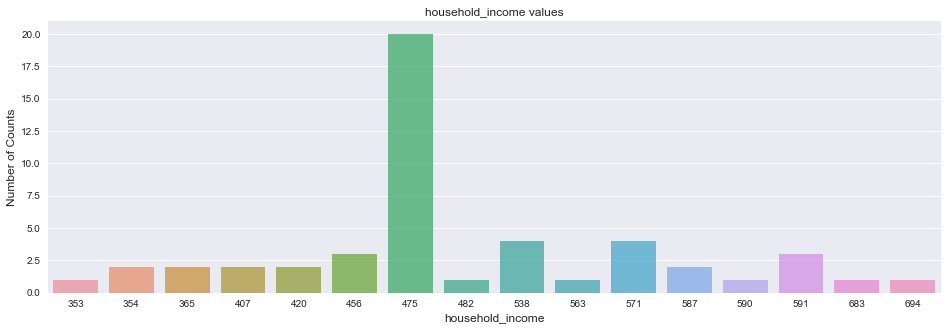

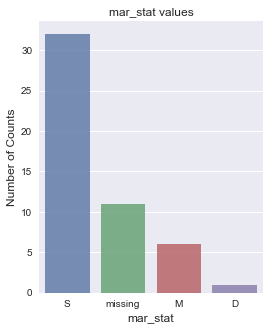

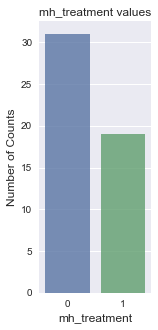

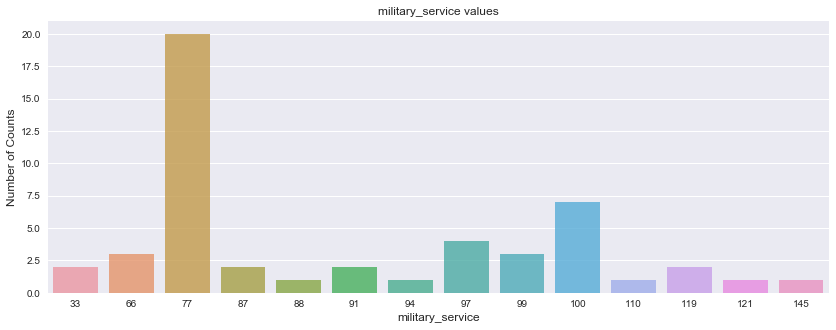

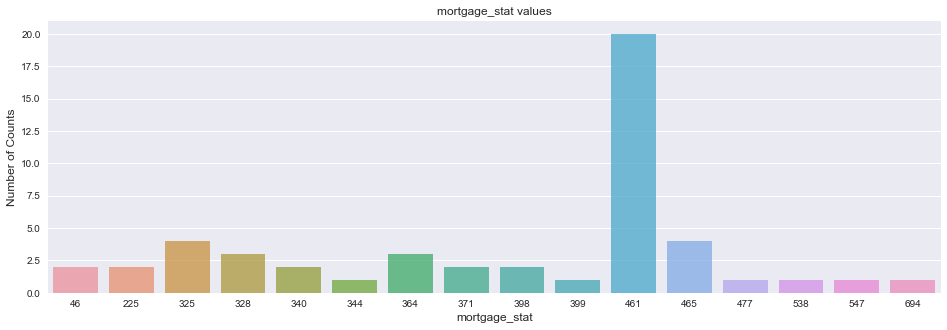

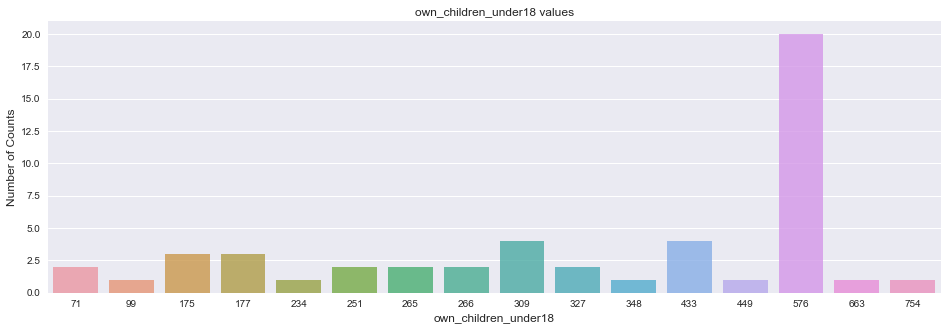

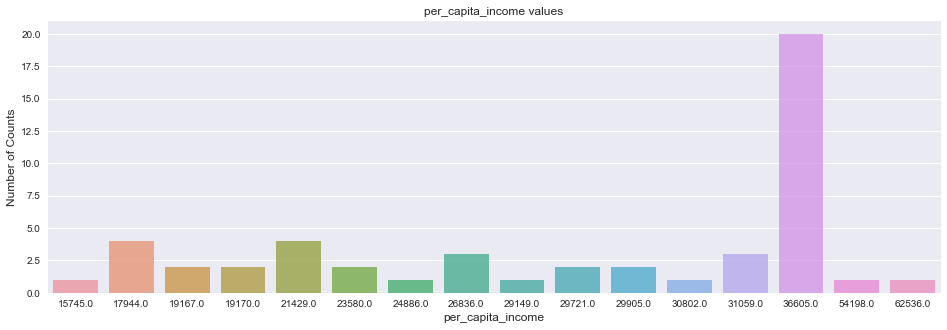

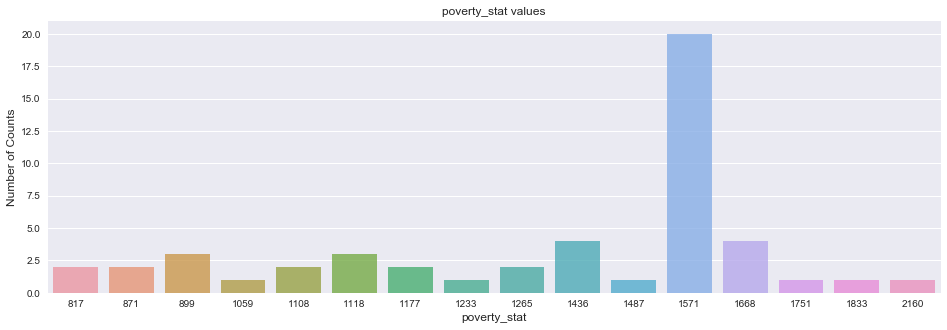

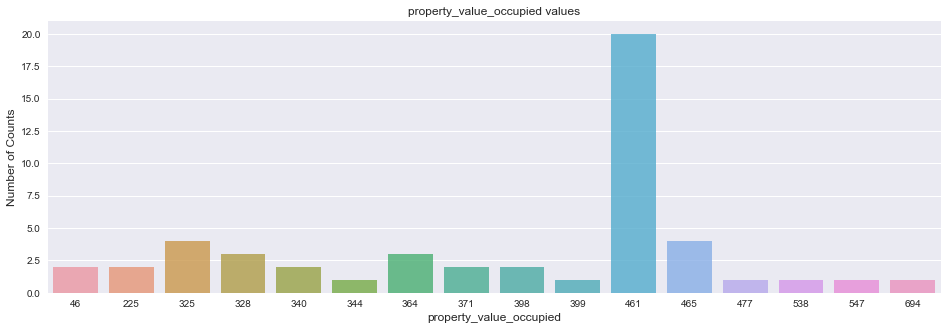

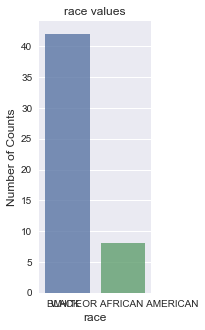

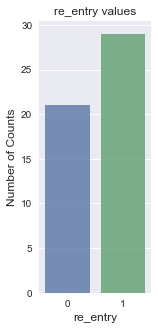

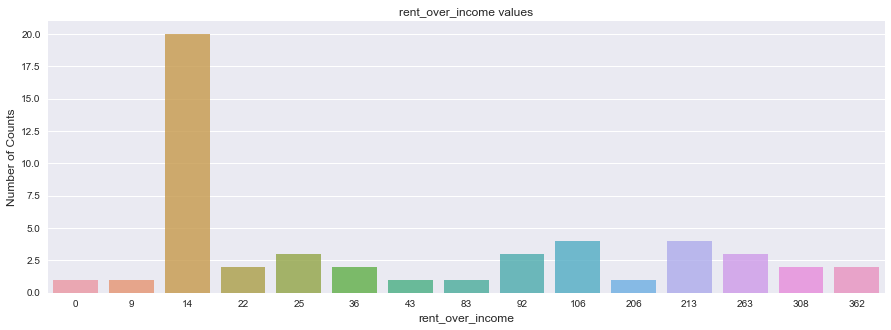

In [32]:
final_plot.plot_df(RF_df2[:50], features_to_see, save=False)

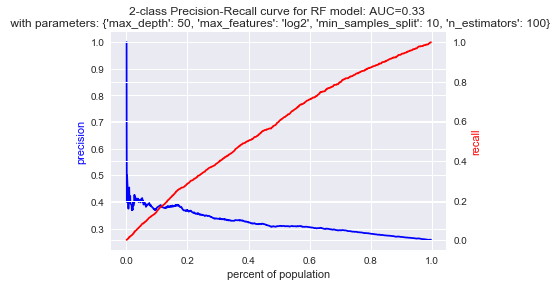

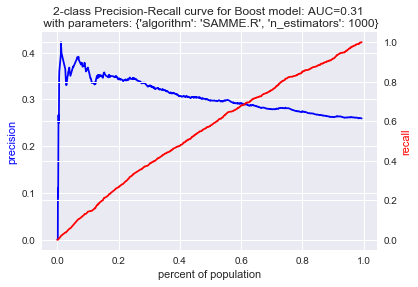

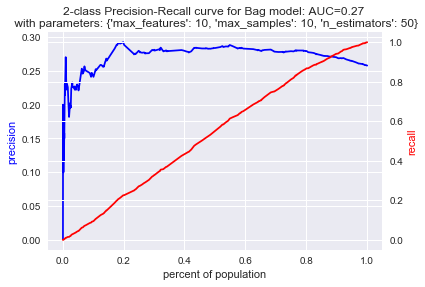

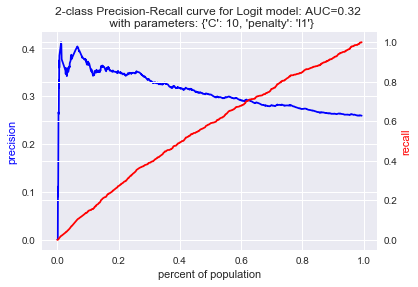

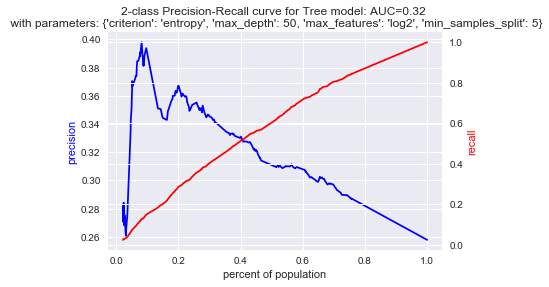

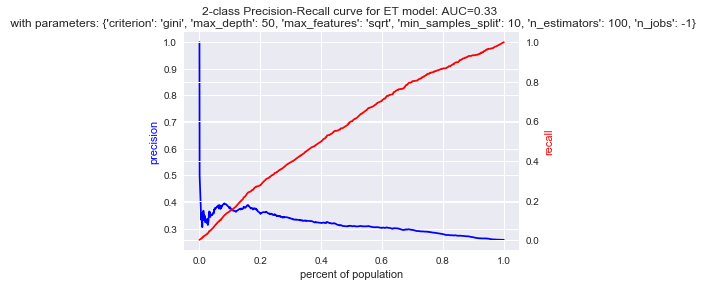

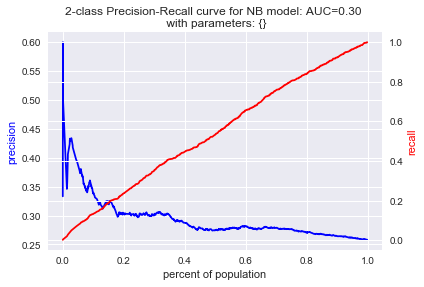

In [33]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"],  x_train, x_test, y_train['within_two'], y_test['within_two'], best)

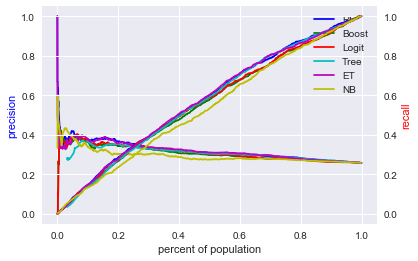

In [34]:
final_plot.plot_mult(['RF', 'Boost', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'], best2)

Feature ranking for within_two
1. age_bin1 (0.057291)
2. sexMALE (0.050012)
3. sexFEMALE (0.049400)
4. mar_statS (0.048472)
5. mar_statM (0.048174)
6. age_bin4 (0.046523)
7. age_bin3 (0.044584)
8. age_bin2 (0.044316)
9. raceWHITE (0.040383)
10. raceBLACK OR AFRICAN AMERICAN (0.040108)
11. mar_statmissing (0.035566)
12. mar_statD (0.033699)
13. per_capita_income_bin1 (0.020333)
14. school_enrollment_16-19_bin3 (0.017495)
15. rent_over_income_bin2 (0.017123)
16. rent_over_income_bin3 (0.016770)
17. military_service_bin3 (0.016303)
18. school_enrollment_16-19_bin4 (0.016200)
19. per_capita_income_bin3 (0.015945)
20. per_capita_income_bin2 (0.015020)


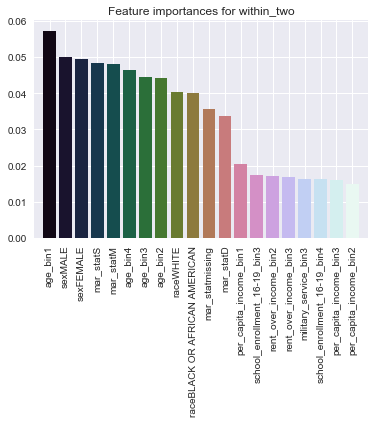

In [35]:
final_plot.feature_importance(x_train, y_train['within_two'], best2, "ET", 20)

In [ ]:
################Print out the Decision Tree####################

In [ ]:
final_plot.print_tree(x_train, y_train["within_one"], best)